<a href="https://colab.research.google.com/github/SEKAR147/DravidianLangTech/blob/main/RNN_from_SK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

In [ ]:
class SingleRNN(nn.Module):
  def __init__(self,n_inputs , n_neurons):
    super(SingleRNN ,self).__init__()

    self.Wx = torch.randn(n_inputs,n_neurons)
    self.Wy = torch.randn(n_neurons , n_neurons)

    self.b = torch.zeros(1,n_neurons)

  def forward(self,X0,X1):
    self.Y0 = torch.tanh(torch.mm(X0,self.Wx)+self.b)
    self.Y1 = torch.tanh(torch.mm(self.Y0,self.Wy)+
                           torch.mm(X1,self.Wx)+self.b)

    return self.Y0 , self.Y1

In [ ]:
N_INPUT = 3 #No of features in ip
N_NEURONS = 5 # No of units in layer

X0_batch = torch.tensor([[0,1,2,],[2,3,4],
                        [6,7,8],[3,7,9]],
                        dtype = torch.float)

X1_batch = torch.tensor([[1,2,3,],[2,4,5],
                         [2,4,5],[2,4,5]],
                         dtype=torch.float)

model = SingleRNN(N_INPUT,N_NEURONS)
Y0_val, Y1_val = model(X0_batch, X1_batch)

In [ ]:
print(Y0_val)
print(Y1_val)

tensor([[-0.1819,  0.0480, -0.7847, -0.7361,  0.9129],
        [ 0.9611,  0.0610, -0.9871, -0.7610,  0.9996],
        [ 1.0000,  0.0870, -1.0000, -0.8046,  1.0000],
        [ 0.9971,  0.7683, -1.0000, -0.9912,  1.0000]])
tensor([[ 0.6852, -0.6042, -0.9926, -0.6736,  0.9402],
        [ 0.9984, -0.3493, -0.9998, -0.5633,  0.9979],
        [ 0.9985, -0.3376, -0.9998, -0.5317,  0.9978],
        [ 0.9991,  0.0618, -0.9999, -0.4636,  0.9992]])


In [ ]:
class BasicRNN(nn.Module):
  def __init__(self,n_inputs,n_neurons):
    super(BasicRNN , self).__init__()


    self.Wx = torch.randn(n_inputs , n_neurons)
    self.Wy = torch.randn(n_neurons , n_neurons)

    self.b = torch.zeros(1,n_neurons)

  def forward(self,X0,X1):

    self.Y0 = torch.tanh(torch.mm(X0,self.Wx)+self.b)

    self.Y1 = torch.tanh(torch.mm(self.Y0 , self.Wy)+torch.mm(X1,self.Wx)+self.b)\

    return self.Y0,self.Y1

In [ ]:
N_INPUT = 3 #No of features in ip
N_NEURONS = 5 # No of units in layer

X0_batch = torch.tensor([[0,1,2,],[2,3,4],
                        [6,7,8],[3,7,9]],
                        dtype = torch.float)

X1_batch = torch.tensor([[1,2,3,],[2,4,5],
                         [2,4,5],[2,4,5]],
                         dtype=torch.float)

model = BasicRNN(N_INPUT,N_NEURONS)

Y0_val , Y1_val = model(X0_batch,X1_batch)

In [ ]:
print(Y0_val)
print(Y1_val)

tensor([[-0.9553, -0.9828, -0.3737,  0.1319,  0.6800],
        [-0.9998, -1.0000,  0.9870,  0.6408,  0.8380],
        [-1.0000, -1.0000,  1.0000,  0.9650,  0.9629],
        [-1.0000, -1.0000,  0.9988,  0.8377,  0.9999]])
tensor([[-0.9975, -1.0000, -0.9350,  0.9957,  0.2081],
        [-0.9957, -1.0000, -0.7443,  0.9949, -0.6005],
        [-0.9974, -1.0000, -0.8842,  0.9930, -0.7143],
        [-0.9972, -1.0000, -0.8506,  0.9944, -0.7123]])


In [ ]:
rnn=nn.RNNCell(3,5)

x_batch = torch.tensor([[[0,1,2], [3,4,5],
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0],
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float)

hx=torch.randn(4,5)
output=[]

#for each time step
for i in range(2):
  hx = rnn(x_batch[i],hx)
  output.append(hx)

print(output)


[tensor([[ 0.4680, -0.1911,  0.9340,  0.1848, -0.9102],
        [ 0.9938,  0.2534,  0.9991,  0.9243, -0.9885],
        [ 1.0000, -0.1725,  1.0000,  0.9986, -0.9950],
        [ 0.9993,  0.9776,  0.9654,  0.9855,  0.5832]],
       grad_fn=<TanhBackward0>), tensor([[ 1.0000,  0.7535,  1.0000,  0.9999, -0.9901],
        [-0.6469,  0.0121,  0.6516,  0.3377, -0.6980],
        [ 0.9958,  0.6767,  0.9999,  0.9960, -0.9408],
        [ 0.8160,  0.7048,  0.9442,  0.6954, -0.3114]],
       grad_fn=<TanhBackward0>)]


In [ ]:
class CleanBasicRNN(nn.Module):
  def __init__(self, batch_size , n_inputs , n_neurons):
    super(CleanBasicRNN,self).__init__()

    self.rnn=nn.RNNCell(n_inputs , n_neurons)
    self.hx = torch.randn(batch_size , n_neurons)

  def forward(self,x):
    output=[]

    for i in range(2):
      self.hx = self.rnn(x[i],self.hx)
      output.append(self.hx)

    return output, self.hx

In [ ]:
FIXED_BATCH_SIZE = 4
N_INPUT=3
N_NEURONS=5

X_batch = torch.tensor([[[0,2,2],[2,2,2],
                         [2,4,5],[5,5,5]],
                        [[2,3,3],[5,6,6],
                         [3,5,7],[2,4,7]]
                        ],dtype = torch.float)

model = CleanBasicRNN(FIXED_BATCH_SIZE,N_INPUT,N_NEURONS)
output_val,stats_val = model(X_batch)
print(output_val)
print(stats_val)




[tensor([[ 0.8936, -0.6449,  0.0280, -0.3422, -0.5416],
        [ 0.9548,  0.4522, -0.5513,  0.0822,  0.2336],
        [ 0.9853,  0.1509, -0.5319, -0.5597, -0.1142],
        [ 0.9977,  0.7838, -0.7762, -0.3764,  0.9518]],
       grad_fn=<TanhBackward0>), tensor([[ 0.9660, -0.2249, -0.3985, -0.3860, -0.0335],
        [ 0.9986,  0.4292, -0.7278, -0.6963,  0.9817],
        [ 0.9958, -0.5551, -0.8601, -0.8766,  0.7930],
        [ 0.9832, -0.8147, -0.8764, -0.8841,  0.8108]],
       grad_fn=<TanhBackward0>)]
tensor([[ 0.9660, -0.2249, -0.3985, -0.3860, -0.0335],
        [ 0.9986,  0.4292, -0.7278, -0.6963,  0.9817],
        [ 0.9958, -0.5551, -0.8601, -0.8766,  0.7930],
        [ 0.9832, -0.8147, -0.8764, -0.8841,  0.8108]],
       grad_fn=<TanhBackward0>)


Importing the Dataset



In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
BATCH_SIZE = 64

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 347kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.75MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.35MB/s]


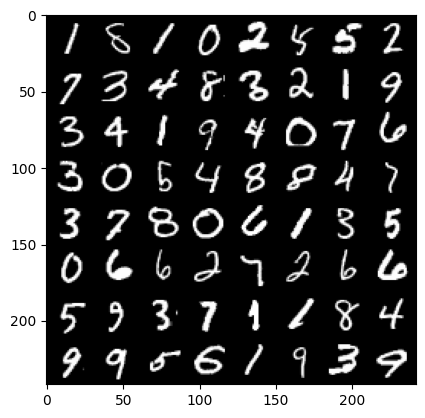

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter=iter(trainloader)
images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))